# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [66]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
# Import date class from datetime module
# from datetime import date
# Returns the current local date
# today = date.today()

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [67]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [68]:
#api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url= f"{url}appid={weather_api_key}&units={units}&q="
#print(query_url)

response = requests.get(query_url + city).json()
response
# data = response.json()
# data
#print(json.dumps(data, indent=4))
    

{'coord': {'lon': -9.0603, 'lat': 42.7762},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 68.27,
  'feels_like': 68.04,
  'temp_min': 65.86,
  'temp_max': 71.17,
  'pressure': 1018,
  'humidity': 69,
  'sea_level': 1018,
  'grnd_level': 1016},
 'visibility': 10000,
 'wind': {'speed': 11.43, 'deg': 19, 'gust': 16.75},
 'clouds': {'all': 73},
 'dt': 1627654837,
 'sys': {'type': 2,
  'id': 72671,
  'country': 'ES',
  'sunrise': 1627622736,
  'sunset': 1627675173},
 'timezone': 7200,
 'id': 3115824,
 'name': 'Muros',
 'cod': 200}

In [65]:
#Empty lists to append to 
city_name=[]
cloudiness_list=[]
country_list=[]
date_list=[]
humidity_list=[]
lat_list=[]
lng_list=[]
max_temp_list=[]
wind_speed_list=[]

city_num = 1
print("Beginning Data Retrieval")
print("-------------------------------")

for city in cities:
    try:
        response= requests.get(query_url + city).json()
        city_name.append(response['name'])
        cloudiness_list.append(response['clouds']["all"])
        country_list.append(response['sys']['country'])
        date_list.append(response['dt'])
        humidity_list.append(response["main"]['humidity'])
        lat_list.append(response['coord']['lat'])
        lng_list.append(response['coord']['lon'])
        max_temp_list.append(response["main"]['temp_max'])
        wind_speed_list.append(response['wind']['speed'])
        
        city_found = response["name"]
        print(f"Processing Record {city_num} of Set 1 | {city_found}")
        city_num = city_num + 1
        
    except:
        print("City not found. Skipping... ")
        
print("-----------------------------")
print("Data Retrieval Complete")     
print("-----------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1 | Carnarvon
Processing Record 2 of Set 1 | Forbes
Processing Record 3 of Set 1 | Gombe
Processing Record 4 of Set 1 | Khatanga
Processing Record 5 of Set 1 | Rikitea
Processing Record 6 of Set 1 | Samarai
City not found. Skipping... 
Processing Record 7 of Set 1 | Hermanus
Processing Record 8 of Set 1 | Thompson
Processing Record 9 of Set 1 | Jamestown
Processing Record 10 of Set 1 | New Norfolk
Processing Record 11 of Set 1 | Sorong
Processing Record 12 of Set 1 | Padang
City not found. Skipping... 
Processing Record 13 of Set 1 | Talcahuano
City not found. Skipping... 
Processing Record 14 of Set 1 | Pandan
Processing Record 15 of Set 1 | Hamilton
Processing Record 16 of Set 1 | Saint Paul Harbor
Processing Record 17 of Set 1 | Pokhara
Processing Record 18 of Set 1 | Pisco
Processing Record 19 of Set 1 | Atuona
Processing Record 20 of Set 1 | Ponta do Sol
Processing Record 21 of Set 1 | Gerāsh
Proce

Processing Record 184 of Set 1 | Cidreira
Processing Record 185 of Set 1 | Redmond
Processing Record 186 of Set 1 | Vallentuna
Processing Record 187 of Set 1 | Peniche
Processing Record 188 of Set 1 | Vostok
Processing Record 189 of Set 1 | Fairbanks
Processing Record 190 of Set 1 | Kulhudhuffushi
City not found. Skipping... 
Processing Record 191 of Set 1 | Marawi
Processing Record 192 of Set 1 | Kampene
Processing Record 193 of Set 1 | Labuhan
Processing Record 194 of Set 1 | Mossamedes
Processing Record 195 of Set 1 | Champerico
Processing Record 196 of Set 1 | Katangli
Processing Record 197 of Set 1 | Upernavik
Processing Record 198 of Set 1 | Cherskiy
Processing Record 199 of Set 1 | Kabare
Processing Record 200 of Set 1 | Fayaoué
Processing Record 201 of Set 1 | Ambam
Processing Record 202 of Set 1 | Kirakira
Processing Record 203 of Set 1 | Alugan
Processing Record 204 of Set 1 | Kisanga
City not found. Skipping... 
Processing Record 205 of Set 1 | Mahon
Processing Record 206 of

Processing Record 363 of Set 1 | Araceli
Processing Record 364 of Set 1 | Kasongo-Lunda
City not found. Skipping... 
Processing Record 365 of Set 1 | Storm Lake
Processing Record 366 of Set 1 | Brae
Processing Record 367 of Set 1 | Chemal
Processing Record 368 of Set 1 | Qasigiannguit
Processing Record 369 of Set 1 | Klichka
Processing Record 370 of Set 1 | Bambanglipuro
Processing Record 371 of Set 1 | Machaneng
Processing Record 372 of Set 1 | Bayjī
Processing Record 373 of Set 1 | Horsham
Processing Record 374 of Set 1 | Dawson
Processing Record 375 of Set 1 | Jatai
Processing Record 376 of Set 1 | Ayagoz
Processing Record 377 of Set 1 | Jiangyou
Processing Record 378 of Set 1 | Bima
Processing Record 379 of Set 1 | Plettenberg Bay
Processing Record 380 of Set 1 | Rawson
Processing Record 381 of Set 1 | Ponta Delgada
Processing Record 382 of Set 1 | Qazvin
Processing Record 383 of Set 1 | Geraldton
Processing Record 384 of Set 1 | Nome
Processing Record 385 of Set 1 | Hailar
Process

Processing Record 549 of Set 1 | Guiren
Processing Record 550 of Set 1 | Mayo
Processing Record 551 of Set 1 | Tuy Hoa
Processing Record 552 of Set 1 | Oddur
Processing Record 553 of Set 1 | Bolitoc
Processing Record 554 of Set 1 | Lucapa
Processing Record 555 of Set 1 | Arman'
Processing Record 556 of Set 1 | Hualmay
Processing Record 557 of Set 1 | Yar-Sale
Processing Record 558 of Set 1 | Sørland
Processing Record 559 of Set 1 | Sarkand
Processing Record 560 of Set 1 | Karasjok
Processing Record 561 of Set 1 | Gibara
Processing Record 562 of Set 1 | Khandyga
Processing Record 563 of Set 1 | Maţāy
Processing Record 564 of Set 1 | Matagami
Processing Record 565 of Set 1 | Xingyi
Processing Record 566 of Set 1 | Talavera
City not found. Skipping... 
Processing Record 567 of Set 1 | Waipawa
Processing Record 568 of Set 1 | Vostochnyy
Processing Record 569 of Set 1 | Tacuatí
Processing Record 570 of Set 1 | Penzance
Processing Record 571 of Set 1 | Lüderitz
Processing Record 572 of Set 1

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [69]:
weather_df=pd.DataFrame({
    "City":city_name,
    "Lat":lat_list,
    "Lng":lng_list,
    "Max Temp":max_temp_list,
    "Humidity":humidity_list,
    "Cloudiness":cloudiness_list,
    "Wind Speed":wind_speed_list,
    "Country":country_list,
    "Date":date_list,
})

weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Carnarvon,-24.8667,113.6333,64.47,69,75,13.80,AU,1627654635
1,Forbes,-33.3833,148.0167,43.32,61,8,8.43,AU,1627654636
2,Gombe,10.2897,11.1673,74.37,84,100,9.64,NG,1627654636
3,Khatanga,71.9667,102.5000,81.59,45,79,9.60,RU,1627654637
4,Rikitea,-23.1203,-134.9692,71.15,71,34,6.26,PF,1627654637
...,...,...,...,...,...,...,...,...,...
588,Contamana,-7.3333,-75.0167,68.86,50,80,5.19,PE,1627654835
589,Derzhavīnsk,51.1000,66.3167,77.65,27,46,8.93,KZ,1627654835
590,Navolato,24.7672,-107.6944,80.13,77,6,2.89,MX,1627654836
591,Newport,51.5877,-2.9984,67.68,73,53,20.98,GB,1627654836


In [70]:
weather_df.to_csv("../output_data/weather_df.csv", index=False, header=True)

In [71]:
#Looking at DataFrame to see if have 100% humidity
weather_stats_df=pd.DataFrame({
    "City":city_name,
    "Lat":lat_list,
    "Lng":lng_list,
    "Max Temp":max_temp_list,
    "Humidity":humidity_list,
    "Cloudiness":cloudiness_list,
    "Wind Speed":wind_speed_list,
    "Country":country_list,
    "Date":date_list,
})

weather_stats_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,5.930000e+02
mean,21.365693,21.482183,71.001939,68.143339,54.615514,7.900624,1.627655e+09
std,33.176715,91.561439,15.344123,22.607880,40.128769,5.467946,8.739653e+01
min,-54.800000,-175.200000,29.620000,7.000000,0.000000,0.000000,1.627654e+09
25%,-6.216700,-63.598600,59.630000,58.000000,9.000000,3.620000,1.627655e+09
50%,27.595900,29.086400,72.720000,73.000000,65.000000,6.910000,1.627655e+09
75%,49.200000,107.339700,81.030000,86.000000,98.000000,11.250000,1.627655e+09
max,78.218600,179.316700,113.740000,100.000000,100.000000,29.930000,1.627655e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [52]:
#  Get the indices of cities that have humidity over 100%.


In [53]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

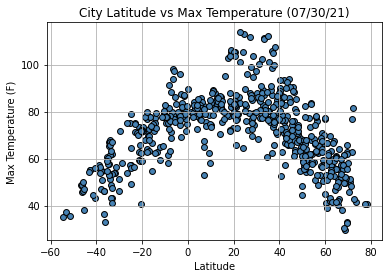

In [72]:
#weather_df.plot(kind="scatter", x= "Lat", y="Max Temp", marker="o", edgecolors="black", size="200")
plt.scatter(lat_list, max_temp_list, c ="steelblue",
            linewidths = 1,
            marker ="o", 
            edgecolor ="black", 
            s = 35)
plt.title(f"City Latitude vs Max Temperature (07/30/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

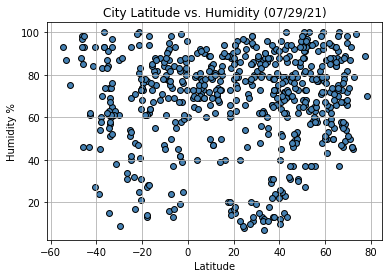

In [73]:
plt.scatter(lat_list, humidity_list, c="steelblue",
           linewidth = 1,
           marker = "o",
           edgecolor = "black",
           s = 35)
plt.title("City Latitude vs. Humidity (07/29/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.grid()
plt.show()

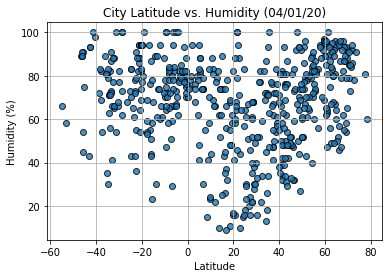

## Latitude vs. Cloudiness Plot

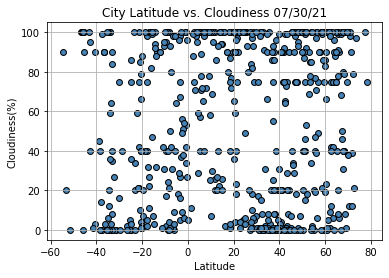

In [74]:
plt.scatter(lat_list, cloudiness_list, c="steelblue",
           linewidth= 1,
           marker = "o",
           edgecolor = "black",
           s = 35)
plt.title("City Latitude vs. Cloudiness 07/30/21")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid()
plt.show()

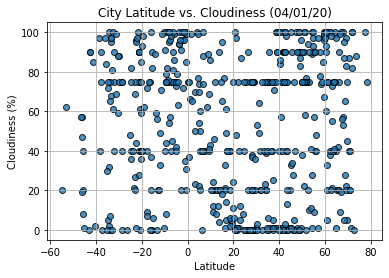

## Latitude vs. Wind Speed Plot

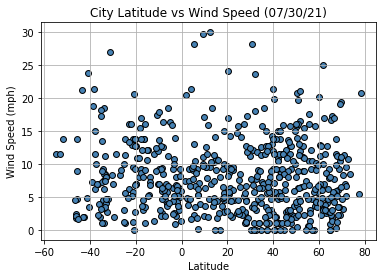

In [75]:
plt.scatter(lat_list, wind_speed_list, c="steelblue",
           linewidth= 1,
           marker = "o",
           edgecolor = "black",
           s =35)
plt.title("City Latitude vs Wind Speed (07/30/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.show()

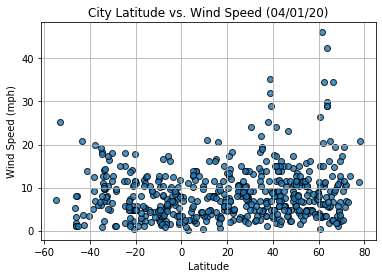

## Linear Regression

The r-value is: 0.00035479672771269793


<function matplotlib.pyplot.show(close=None, block=None)>

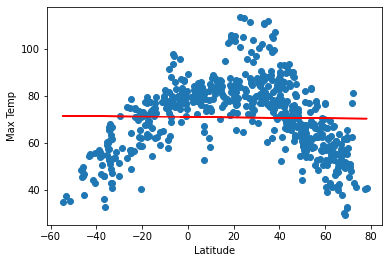

In [82]:
x_values= weather_df["Lat"].astype('float')
y_values= weather_df["Max Temp"].astype('float')

(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))

#plot scatter plot
plt.scatter(x_values, y_values)


#plot regression line
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6,10), fontsize =15, color="red")

#label plot
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

#print r square value
print(f"The r-value is: {rvalue**2}")

#show plot
plt.show

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


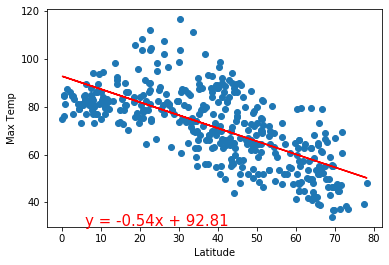

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


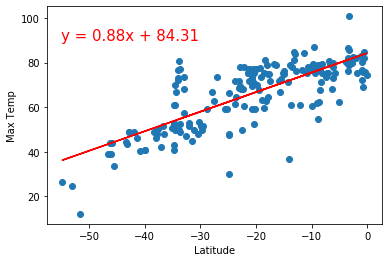

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


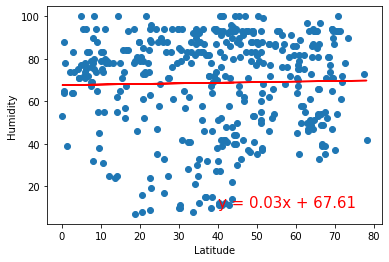

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


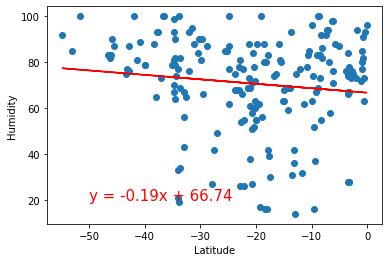

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


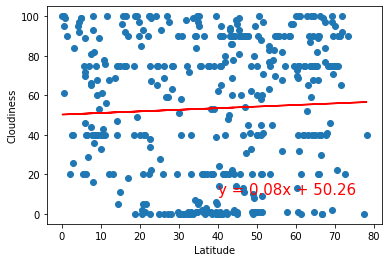

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


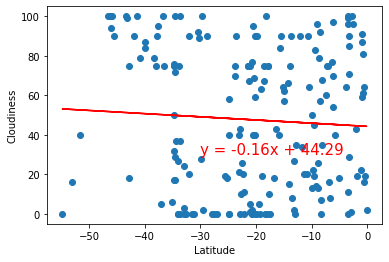

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


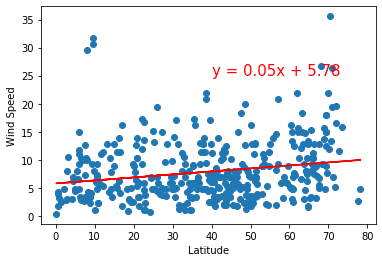

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


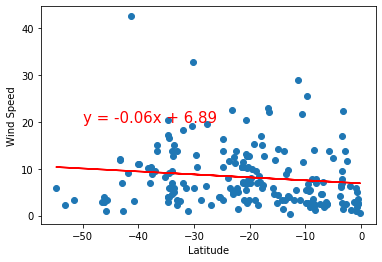